In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [77]:
df = pd.read_csv(os.path.join("..", "Resources", "All_Tweet_Twit.csv"))
df.head()

,Date,Stock,Tweetpolarity,Tweetsubjectivity,Total_Tweets,Twitpolarity,Twitsubjectivity,Total_Twits,Value,Calc
0,11/7/19,AMZN,-0.35,0.03,485,0.052850,0.311728,698,-15.56,0
1,11/7/19,BBY,-0.24,0.38,480,0.104050,0.120468,22,0.04,1
2,11/7/19,HD,0.15,0.58,498,0.018459,0.199787,28,-1.06,0
3,11/7/19,LOW,0.36,0.25,278,0.009259,0.202020,8,-0.85,0
4,11/7/19,M,0.00,0.40,933,0.069366,0.129648,43,-0.09,0


In [78]:
y = df["Calc"]
#y = y.astype('int64', copy=False)
target_names = ["negative", "positive"]

In [86]:
X = df.drop(["Date", "Stock", "Calc", "Value", "Tweetpolarity", "Tweetsubjectivity", "Total_Tweets"], axis=1)
X.head()

,Twitpolarity,Twitsubjectivity,Total_Twits
0,0.052850,0.311728,698
1,0.104050,0.120468,22
2,0.018459,0.199787,28
3,0.009259,0.202020,8
4,0.069366,0.129648,43


KNN model predictor

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.600
k: 3, Train/Test Score: 0.719/0.550
k: 5, Train/Test Score: 0.702/0.400
k: 7, Train/Test Score: 0.702/0.500
k: 9, Train/Test Score: 0.649/0.450
k: 11, Train/Test Score: 0.614/0.400
k: 13, Train/Test Score: 0.579/0.400
k: 15, Train/Test Score: 0.614/0.350
k: 17, Train/Test Score: 0.614/0.350
k: 19, Train/Test Score: 0.596/0.350


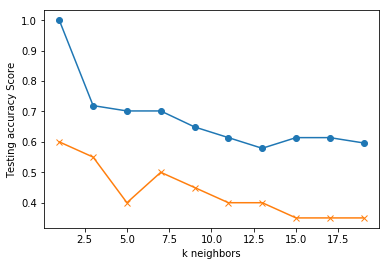

In [88]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
k_values = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    k_values.append({k})
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [89]:
#convert scores to dataframe and export to csv.
Twit_KNN_Scores = pd.DataFrame(
    {'k': k,
     'Twit_Train_score': train_scores,
     'Twit_Test_score': test_scores
    })
Twit_KNN_Scores.to_csv("Twit_KNN_scores.csv", index=False, header=True)
Twit_KNN_Scores.head()

,k,Twit_Train_score,Twit_Test_score
0,19,1.000000,0.60
1,19,0.719298,0.55
2,19,0.701754,0.40
3,19,0.701754,0.50
4,19,0.649123,0.45


In [90]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.400


Tree model predictor

In [91]:
target = df["Calc"]
target_names = ["negative", "positive"]

In [92]:
data = df.drop(["Date", "Stock", "Calc", "Value", "Tweetpolarity", "Tweetsubjectivity", "Total_Tweets"], axis=1)
feature_names = data.columns

In [93]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.55

Random Forest Predictor

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.45

In [95]:
Twit_rf_score = []
for n in range (2, 100, 1):
    rf = RandomForestClassifier(n_estimators=n)
    rf = rf.fit(X_train, y_train)
    rf.score(X_test, y_test)
    score = rf.score(X_test, y_test)
    Twit_rf_score.append(score)

Twit_rf_score_df = pd.DataFrame(Twit_rf_score)
Twit_rf_score_df.index.name = 'n_estimators'
Twit_rf_score_df.to_csv("Twit_rf_scores.csv", index=True, header=True)
Twit_rf_score

[0.45,
 0.45,
 0.55,
 0.3,
 0.55,
 0.35,
 0.55,
 0.55,
 0.5,
 0.4,
 0.45,
 0.45,
 0.5,
 0.4,
 0.45,
 0.5,
 0.5,
 0.55,
 0.5,
 0.35,
 0.4,
 0.5,
 0.45,
 0.4,
 0.45,
 0.5,
 0.45,
 0.45,
 0.4,
 0.5,
 0.5,
 0.4,
 0.4,
 0.45,
 0.45,
 0.5,
 0.4,
 0.35,
 0.5,
 0.55,
 0.55,
 0.5,
 0.45,
 0.5,
 0.55,
 0.4,
 0.4,
 0.4,
 0.4,
 0.5,
 0.5,
 0.4,
 0.45,
 0.45,
 0.45,
 0.35,
 0.45,
 0.45,
 0.35,
 0.5,
 0.5,
 0.5,
 0.45,
 0.5,
 0.45,
 0.4,
 0.5,
 0.45,
 0.5,
 0.4,
 0.5,
 0.4,
 0.45,
 0.5,
 0.4,
 0.45,
 0.4,
 0.45,
 0.45,
 0.55,
 0.4,
 0.4,
 0.35,
 0.4,
 0.45,
 0.55,
 0.4,
 0.4,
 0.35,
 0.45,
 0.45,
 0.4,
 0.5,
 0.4,
 0.45,
 0.4,
 0.45,
 0.5]

In [96]:
PieData = sorted(zip(rf.feature_importances_, feature_names), reverse=True)
PieData

[(0.38217086939389666, 'Twitpolarity'),
 (0.31538368936243555, 'Total_Twits'),
 (0.30244544124366785, 'Twitsubjectivity')]

In [97]:
#send PieData to csv
Twit_Pie_df = pd.DataFrame(PieData)
Twit_Pie_df.to_csv("Twit_Pie_df.csv", index=False, header=True)

NOW USE THE TWEET DATA

In [98]:
X = df.drop(["Date", "Stock", "Calc", "Value", "Twitpolarity", "Twitsubjectivity", "Total_Twits"], axis=1)
X.head()

,Tweetpolarity,Tweetsubjectivity,Total_Tweets
0,-0.35,0.03,485
1,-0.24,0.38,480
2,0.15,0.58,498
3,0.36,0.25,278
4,0.00,0.40,933


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.600
k: 3, Train/Test Score: 0.614/0.750
k: 5, Train/Test Score: 0.684/0.700
k: 7, Train/Test Score: 0.649/0.700
k: 9, Train/Test Score: 0.649/0.700
k: 11, Train/Test Score: 0.667/0.700
k: 13, Train/Test Score: 0.649/0.700
k: 15, Train/Test Score: 0.667/0.700
k: 17, Train/Test Score: 0.667/0.700
k: 19, Train/Test Score: 0.667/0.700


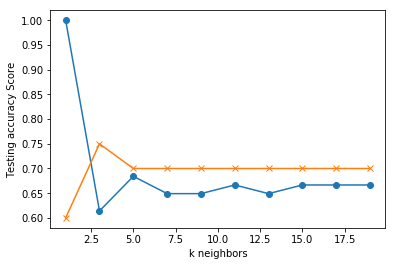

In [100]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
k_values = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    k_values.append({k})
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [101]:
#convert scores to dataframe and export to csv.
Tweet_KNN_Scores = pd.DataFrame(
    {'k': k,
     'Twit_Train_score': train_scores,
     'Twit_Test_score': test_scores
    })
Tweet_KNN_Scores.to_csv("Tweet_KNN_scores.csv", index=False, header=True)
Tweet_KNN_Scores.head()

,k,Twit_Train_score,Twit_Test_score
0,19,1.000000,0.60
1,19,0.614035,0.75
2,19,0.684211,0.70
3,19,0.649123,0.70
4,19,0.649123,0.70


In [102]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.700


Tree model predictor

In [103]:
target = df["Calc"]
target_names = ["negative", "positive"]

In [104]:
data = df.drop(["Date", "Stock", "Calc", "Value", "Twitpolarity", "Twitsubjectivity", "Total_Twits"], axis=1)
feature_names = data.columns

In [105]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7

Random Forest Predictor

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6

In [107]:
Tweet_rf_score = []
for n in range (2, 100, 1):
    rf = RandomForestClassifier(n_estimators=n)
    rf = rf.fit(X_train, y_train)
    rf.score(X_test, y_test)
    score = rf.score(X_test, y_test)
    Tweet_rf_score.append(score)

Tweet_rf_score_df = pd.DataFrame(Twit_rf_score)
Tweet_rf_score_df.index.name = 'n_estimators'
Tweet_rf_score_df.to_csv("Tweet_rf_scores.csv", index=True, header=True)
Tweet_rf_score

[0.5,
 0.3,
 0.75,
 0.55,
 0.55,
 0.6,
 0.55,
 0.55,
 0.5,
 0.6,
 0.6,
 0.65,
 0.7,
 0.7,
 0.65,
 0.6,
 0.7,
 0.6,
 0.6,
 0.6,
 0.7,
 0.65,
 0.55,
 0.65,
 0.6,
 0.65,
 0.7,
 0.75,
 0.6,
 0.6,
 0.7,
 0.65,
 0.55,
 0.7,
 0.6,
 0.6,
 0.5,
 0.65,
 0.65,
 0.55,
 0.65,
 0.6,
 0.75,
 0.6,
 0.6,
 0.6,
 0.55,
 0.7,
 0.55,
 0.65,
 0.55,
 0.55,
 0.65,
 0.65,
 0.6,
 0.65,
 0.7,
 0.7,
 0.6,
 0.55,
 0.7,
 0.55,
 0.7,
 0.55,
 0.55,
 0.65,
 0.7,
 0.75,
 0.65,
 0.65,
 0.7,
 0.7,
 0.5,
 0.6,
 0.7,
 0.5,
 0.6,
 0.65,
 0.65,
 0.65,
 0.65,
 0.6,
 0.55,
 0.5,
 0.6,
 0.65,
 0.55,
 0.6,
 0.55,
 0.6,
 0.6,
 0.65,
 0.7,
 0.55,
 0.55,
 0.6,
 0.6,
 0.6]